In [1]:
# author: Yanshun Zhao
# create at 2023.11.13
# email: 2679466736@qq.com

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 定义区域

In [2]:
h=0.1 #空间步长
t_len=0.002*np.pi#时间步长
T_len=[0,np.pi/2] #时间
X_len=[-5,5]#空间

# 初值

In [3]:
def f(x):
    return 4/(np.exp(x)+np.exp(-x))

In [4]:
#生成解的网格
U=np.zeros([int((X_len[1]-X_len[0])/h)+1,int((T_len[1]-T_len[0])/t_len)+1])
V=np.zeros([int((X_len[1]-X_len[0])/h)+1,int((T_len[1]-T_len[0])/t_len)+1])
for i in range(len(U)): #第一层为初值
    U[i][0]=f(-5+i*h)

# 有限元矩阵

In [5]:
def finite(h):
    A=np.zeros([int((X_len[1]-X_len[0])/h)+1,int((X_len[1]-X_len[0])/h)+1])
    B=np.zeros([int((X_len[1]-X_len[0])/h)+1,int((X_len[1]-X_len[0])/h)+1])
    A[0][0],A[0][1]=3/4*h,0.5*h
    A[int((X_len[1]-X_len[0])/h)][int((X_len[1]-X_len[0])/h)-1],A[int((X_len[1]-X_len[0])/h)][int((X_len[1]-X_len[0])/h)]=0.5*h,3/4*h
    B[0][0],B[0][1]=np.pi*np.pi/(4*h),-np.pi*np.pi/(8*h)
    B[int((X_len[1]-X_len[0])/h)][int((X_len[1]-X_len[0])/h)-1],B[int((X_len[1]-X_len[0])/h)][int((X_len[1]-X_len[0])/h)]=-np.pi*np.pi/(8*h),np.pi*np.pi/(4*h)
    for i in range(1,int((X_len[1]-X_len[0])/h)):
        A[i][i]=3/4*h
        A[i][i-1],A[i][i+1]=0.5*h,0.5*h
        B[i][i]=np.pi*np.pi/(4*h)
        B[i][i-1],B[i][i+1]=-np.pi*np.pi/(8*h),-np.pi*np.pi/(8*h)
    return A,B

# backeuler求解

In [6]:
A,B=finite(h)
for i in range(1,int((T_len[1]-T_len[0])/t_len)+1):
    a=pow(U[:,i-1],2)+pow(V[:,i-1],2)
    a_f=np.eye(len(a))
    for j in range(len(a)):
        a_f[j][j]=a[j]
    A_f=A@a_f
    bias1=A@V[:,i-1]
    bias2=A@U[:,i-1]
    S=t_len/2*B-t_len*A_f
    A_=np.linalg.inv(A)
    V[:,i]=np.linalg.inv(A+S@A_@S)@(bias1-S@A_@bias2)
    U[:,i]=A_@(S@V[:,i]+bias2)

C:\Users\赵延顺\AppData\Local\Temp\ipykernel_9344\2209969749.py:11: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


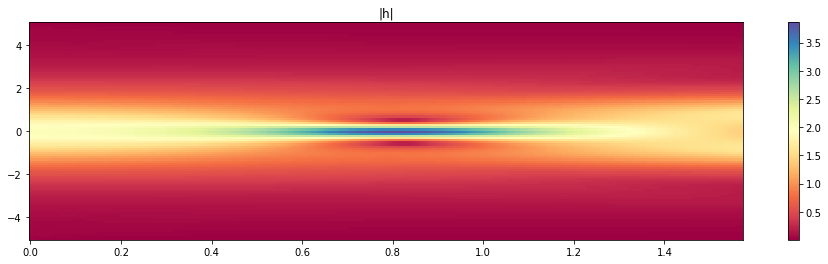

In [7]:
plt.rcParams['figure.figsize'] = (16,4)
y_grid = np.linspace(start=X_len[0], stop=X_len[1], num=int((X_len[1]-X_len[0])/h)+1, endpoint=True).reshape(-1, 1).repeat(int((T_len[1]-T_len[0])/t_len)+1, axis=1)
x_grid = np.linspace(start=T_len[0], stop=T_len[1], num=int((T_len[1]-T_len[0])/t_len)+1, endpoint=True).reshape(1, -1).repeat(int((X_len[1]-X_len[0])/h)+1, axis=0)
grid = np.stack((x_grid, y_grid), axis=2)

fig, ax = plt.subplots()
im = ax.pcolor(grid[:, :, 0], grid[:, :, 1], np.sqrt(pow(U,2)+pow(V,2)), cmap="Spectral")
plt.title('|h|')
fig.colorbar(im)

fig.show()